In [16]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
df=pd.read_csv('nba.csv')
df

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117.0
2,John Holland,Boston Celtics,30.0,SG,27.0,6-5,205.0,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,6-10,231.0,NaN,5000000.0
...,...,...,...,...,...,...,...,...,...
453,Shelvin Mack,Utah Jazz,8.0,PG,26.0,6-3,203.0,Butler,2433333.0
454,Raul Neto,Utah Jazz,25.0,PG,24.0,6-1,179.0,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21.0,C,26.0,7-3,256.0,NaN,2900000.0
456,Jeff Withey,Utah Jazz,24.0,C,26.0,7-0,231.0,Kansas,947276.0


In [17]:
df.dtypes

Name         object
Team         object
Number      float64
Position     object
Age         float64
Height       object
Weight      float64
College      object
Salary      float64
dtype: object

In [18]:
#replacing missing values
df['Weight'] = df['Weight'].fillna(df['Weight'].mean())

In [19]:
df['Number'] = df['Number'].fillna(df['Number'].mean())

In [20]:
df['Age'] = df['Age'].fillna(df['Age'].quantile(0.5))

In [21]:
df.isna().sum()

Name         1
Team         1
Number       0
Position     1
Age          0
Height       1
Weight       0
College     85
Salary      12
dtype: int64

In [22]:
#delete rows
alpha = df.select_dtypes(include='object')

In [23]:
alpha.isna().sum()

Name         1
Team         1
Position     1
Height       1
College     85
dtype: int64

In [24]:
alpha.dropna(subset=['College'],axis=0,inplace=True)

In [25]:
alpha.isna().sum()

Name        0
Team        0
Position    0
Height      0
College     0
dtype: int64

In [26]:
#data tranformation using normalization minmax
numeric=df.select_dtypes(include=np.number)

In [29]:
for i in numeric:
    numeric[i] = (numeric[i]-numeric[i].min())/(numeric[i].max()-numeric[i].min())

<Axes: ylabel='Frequency'>

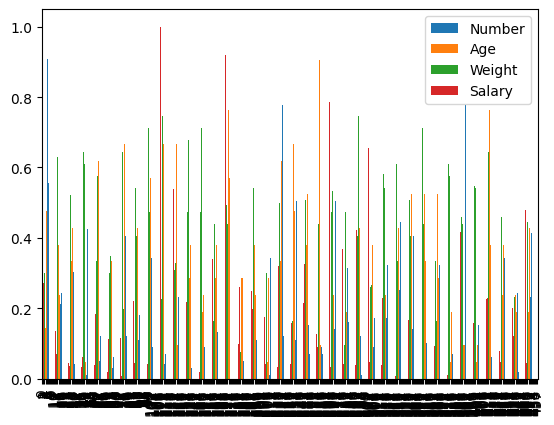

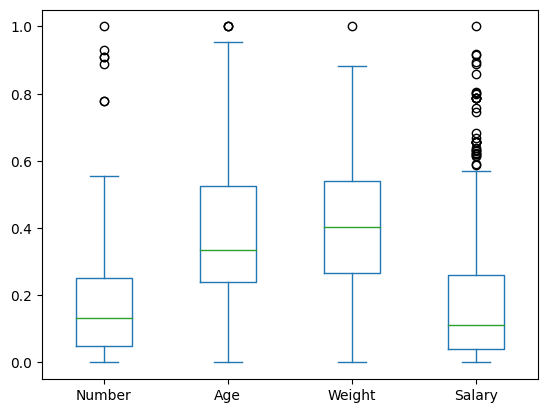

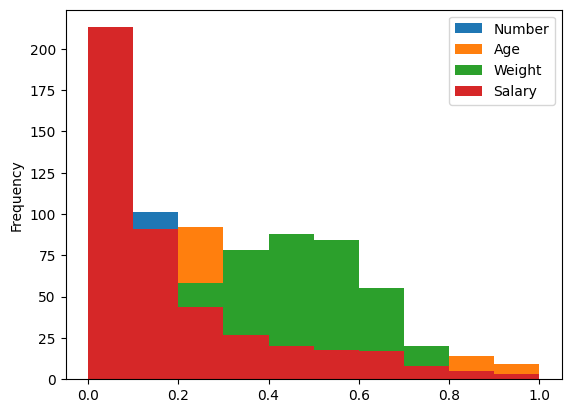

In [30]:
numeric.plot(kind="bar")
numeric.plot(kind="box")
numeric.plot(kind="hist")

In [31]:
zs = df.select_dtypes(include=np.number)

In [34]:
for i in zs:
    zs[i] = (zs[i]-zs[i].mean())/zs[i].std()

<Axes: ylabel='Frequency'>

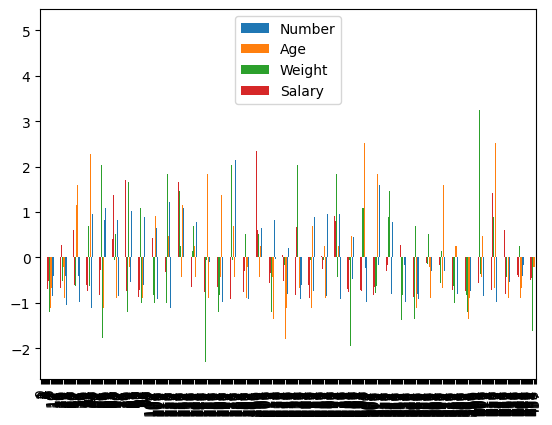

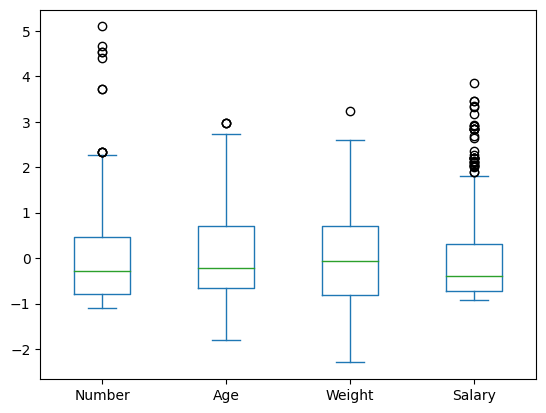

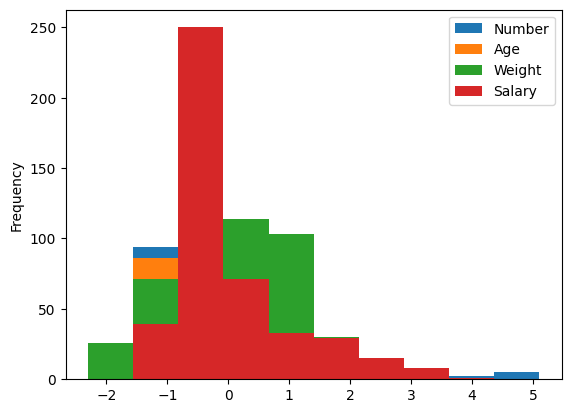

In [35]:
zs.plot(kind="bar")
zs.plot(kind="box")
zs.plot(kind="hist")

In [36]:
zs.skew()

Number    1.670199
Age       0.628318
Weight    0.113912
Salary    1.576321
dtype: float64

In [37]:
zs.mean()

Number    8.144868e-17
Age      -1.202338e-16
Weight    6.787390e-17
Salary    7.069582e-17
dtype: float64

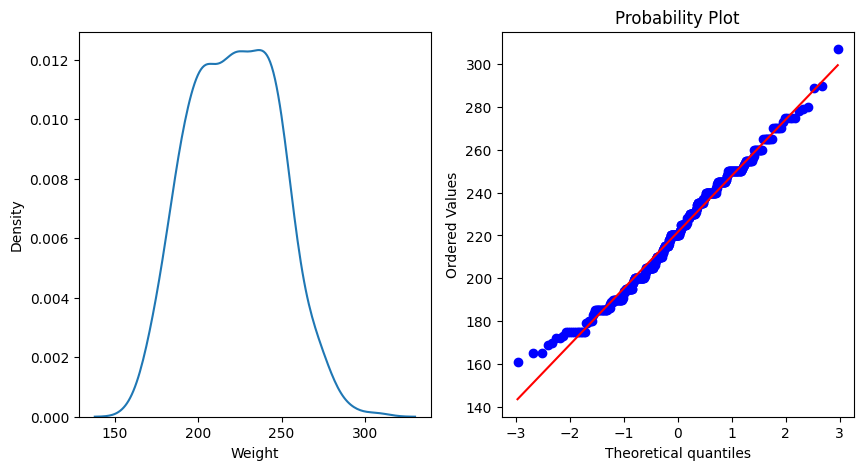

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
import pylab

warnings.filterwarnings('ignore')
def normality(data,feature):
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    sns.kdeplot(data[feature])
    plt.subplot(1,2,2)
    stats.probplot(data[feature],plot=pylab)
    plt.show()
normality(df,"Weight")    
    